In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from datasets import load_dataset

/data/katie_kang/miniconda3/envs/trlx2/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# test_answer_accs = np.load("/data/katie_kang/reasoning_data/data/MATH_aug/test_answer_types5.npy")==0
test_answer_accs = np.load("../data/MATH_aug/test_answer_types5.npy")==0

hard_idxs = np.where(test_answer_accs.sum(axis=-1)==0)[0]
easy_idxs = np.where(test_answer_accs.sum(axis=-1)>2)[0]


In [7]:
dataset = load_dataset("hendrycks/competition_math", cache_dir=None)
hard_idxs = np.where(np.array(dataset["test"]["level"])=='Level 5')[0]


/data/katie_kang/miniconda3/envs/trlx2/lib/python3.9/site-packages/datasets/load.py:1461: FutureWarning: The repository for hendrycks/competition_math contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/hendrycks/competition_math
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


In [5]:
CKPT_NAME=f"math_aug3_easy{0:.2f}_medium0.00_hard{1:.2f}_total{20000}"
print((np.load("../ckpts/"+CKPT_NAME+"/test_answer_types1_seed2.npy")==0).mean(axis=-1)[hard_idxs].mean())


0.0429042904290429


In [22]:
accs_5000 = []
NUM_TRAIN_POINTS=5000
for HARD_RATIO in [0, 0.25, 0.5, 0.75, 1]:
    EASY_RATIO=(1-HARD_RATIO)

    CKPT_NAME=f"math_aug2_easy{EASY_RATIO:.2f}_hard{HARD_RATIO:.2f}_total{NUM_TRAIN_POINTS}"
    print(CKPT_NAME)
    print((np.load("../ckpts/"+CKPT_NAME+"/test_answer_types5_seed2.npy")==0).mean(axis=-1)[hard_idxs].mean())
    accs_5000.append((np.load("../ckpts/"+CKPT_NAME+"/test_answer_types5_seed2.npy")==0).mean(axis=-1)[hard_idxs].mean())

math_aug2_easy1.00_hard0.00_total5000
0.026591230551626596
math_aug2_easy0.75_hard0.25_total5000
0.025742574257425748
math_aug2_easy0.50_hard0.50_total5000
0.027911362564827912
math_aug2_easy0.25_hard0.75_total5000
0.032626119754832636
math_aug2_easy0.00_hard1.00_total5000
0.0314002828854314


In [11]:
accs_5000 = []
NUM_TRAIN_POINTS=5000
for HARD_RATIO in [0, 0.25, 0.5, 0.75, 1]:
    EASY_RATIO=(1-HARD_RATIO)

    CKPT_NAME=f"math_aug2_easy{EASY_RATIO:.2f}_hard{HARD_RATIO:.2f}_total{NUM_TRAIN_POINTS}"
    print(CKPT_NAME)
    print((np.load("../ckpts/"+CKPT_NAME+"/test_answer_types5_seed2.npy")==0).mean(axis=-1)[easy_idxs].mean())
    accs_5000.append((np.load("../ckpts/"+CKPT_NAME+"/test_answer_types5_seed2.npy")==0).mean(axis=-1)[hard_idxs].mean())

math_aug2_easy1.00_hard0.00_total5000
0.4414730878186968
math_aug2_easy0.75_hard0.25_total5000
0.4512181303116148
math_aug2_easy0.50_hard0.50_total5000
0.4705949008498584
math_aug2_easy0.25_hard0.75_total5000
0.4647025495750708
math_aug2_easy0.00_hard1.00_total5000
0.41382436260623234


In [42]:
accs_5000 = []
NUM_TRAIN_POINTS=20000
for HARD_RATIO in [0,0.25, 0.5, 0.75, 1]:
    EASY_RATIO=(1-HARD_RATIO)

    CKPT_NAME=f"math_aug2_easy{EASY_RATIO:.2f}_hard{HARD_RATIO:.2f}_total{NUM_TRAIN_POINTS}"
    print(CKPT_NAME)
    print((np.load("../ckpts/"+CKPT_NAME+"/test_answer_types5_seed2.npy")==0).mean(axis=-1)[hard_idxs].mean())
    accs_5000.append((np.load("../ckpts/"+CKPT_NAME+"/test_answer_types5_seed2.npy")==0).mean(axis=-1)[hard_idxs].mean())

math_aug2_easy1.00_hard0.00_total20000
0.031117397454031116
math_aug2_easy0.75_hard0.25_total20000
0.03743517208863744
math_aug2_easy0.50_hard0.50_total20000
0.0446958981612447
math_aug2_easy0.25_hard0.75_total20000
0.04780763790664781
math_aug2_easy0.00_hard1.00_total20000
0.04941065535124941


In [8]:
accs_5000 = []
NUM_TRAIN_POINTS=20000
for HARD_RATIO in [0.75, 1]:
    EASY_RATIO=(1-HARD_RATIO)

    CKPT_NAME=f"math_aug2_easy{EASY_RATIO:.2f}_hard{HARD_RATIO:.2f}_total{NUM_TRAIN_POINTS}_epochs2"
    print(CKPT_NAME)
    print((np.load("ckpts/"+CKPT_NAME+"/test_answer_types5_seed2.npy")==0).mean(axis=-1)[hard_idxs].mean())
    accs_5000.append((np.load("ckpts/"+CKPT_NAME+"/test_answer_types5_seed2.npy")==0).mean(axis=-1)[hard_idxs].mean())

math_aug2_easy0.25_hard0.75_total20000_epochs2
0.08006182380216384
math_aug2_easy0.00_hard1.00_total20000_epochs2
0.07727975270479136


In [9]:
accs_5000 = []
NUM_TRAIN_POINTS=20000
for HARD_RATIO in [0.75, 1]:
    EASY_RATIO=(1-HARD_RATIO)

    CKPT_NAME=f"math_aug2_easy{EASY_RATIO:.2f}_hard{HARD_RATIO:.2f}_total{NUM_TRAIN_POINTS}_epochs2"
    print(CKPT_NAME)
    print((np.load("ckpts/"+CKPT_NAME+"/test_answer_types5_seed2.npy")==0).mean(axis=-1)[easy_idxs].mean())


math_aug2_easy0.25_hard0.75_total20000_epochs2
0.5126345609065156
math_aug2_easy0.00_hard1.00_total20000_epochs2
0.4979036827195467


In [46]:
accs_5000 = []
NUM_TRAIN_POINTS=20000
for HARD_RATIO in [1]:
    EASY_RATIO=(1-HARD_RATIO)

    CKPT_NAME=f"math_aug2_easy{EASY_RATIO:.2f}_hard{HARD_RATIO:.2f}_total{NUM_TRAIN_POINTS}_epochs5"
    print(CKPT_NAME)
    print((np.load("../ckpts/"+CKPT_NAME+"/test_answer_types1_seed2.npy")==0).mean(axis=-1)[hard_idxs].mean())


math_aug2_easy0.00_hard1.00_total20000_epochs5
0.10293663060278208


In [47]:
accs_5000 = []
NUM_TRAIN_POINTS=20000
for HARD_RATIO in [1]:
    EASY_RATIO=(1-HARD_RATIO)

    CKPT_NAME=f"math_aug2_easy{EASY_RATIO:.2f}_hard{HARD_RATIO:.2f}_total{NUM_TRAIN_POINTS}_epochs5"
    print(CKPT_NAME)
    print((np.load("../ckpts/"+CKPT_NAME+"/test_answer_types1_seed2.npy")==0).mean(axis=-1)[easy_idxs].mean())


math_aug2_easy0.00_hard1.00_total20000_epochs5
0.5722379603399433


In [10]:
accs_5000 = []
NUM_TRAIN_POINTS=20000
for HARD_RATIO in [0,0.25, 0.5, 0.75, 1]:
    EASY_RATIO=(1-HARD_RATIO)

    CKPT_NAME=f"math_aug2_easy{EASY_RATIO:.2f}_hard{HARD_RATIO:.2f}_total{NUM_TRAIN_POINTS}"
    print(CKPT_NAME)
    print((np.load("../ckpts/"+CKPT_NAME+"/test_answer_types5_seed2.npy")==0).mean(axis=-1)[easy_idxs].mean())
    accs_5000.append((np.load("../ckpts/"+CKPT_NAME+"/test_answer_types5_seed2.npy")==0).mean(axis=-1)[easy_idxs].mean())

math_aug2_easy1.00_hard0.00_total20000
0.5607932011331446
math_aug2_easy0.75_hard0.25_total20000
0.6047592067988669
math_aug2_easy0.50_hard0.50_total20000
0.6203966005665722
math_aug2_easy0.25_hard0.75_total20000
0.6156373937677053
math_aug2_easy0.00_hard1.00_total20000
0.5720113314447592


In [2]:
accs_5000 = []
NUM_TRAIN_POINTS=20000
for HARD_RATIO in [0,0.25, 0.5, 0.75, 1]:
    EASY_RATIO=(1-HARD_RATIO)

    CKPT_NAME=f"math_aug2_easy{EASY_RATIO:.2f}_hard{HARD_RATIO:.2f}_total{NUM_TRAIN_POINTS}"
    print(CKPT_NAME)
    print((np.load("../ckpts/"+CKPT_NAME+"/test_answer_types5_seed2.npy")==0).mean(axis=-1).mean())
    accs_5000.append((np.load("../ckpts/"+CKPT_NAME+"/test_answer_types5_seed2.npy")==0).mean(axis=-1).mean())

math_aug2_easy1.00_hard0.00_total20000
0.24588000000000002
math_aug2_easy0.75_hard0.25_total20000
0.27296000000000004
math_aug2_easy0.50_hard0.50_total20000
0.28092
math_aug2_easy0.25_hard0.75_total20000
0.285
math_aug2_easy0.00_hard1.00_total20000
0.26832


Text(0, 0.5, 'test accs')

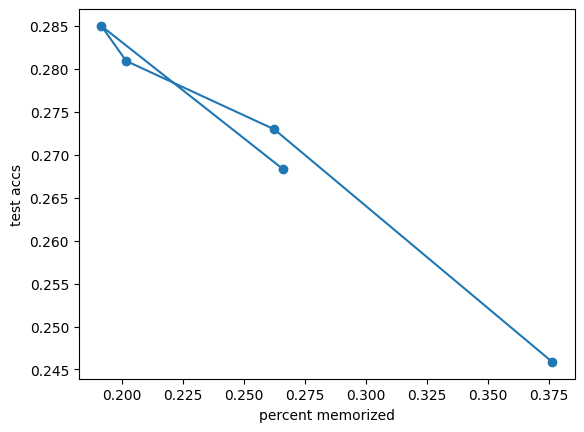

In [7]:
plt.plot([0.3762, 0.2624, 0.2018, 0.1916, 0.266 ], accs_5000, "o-")

plt.xlabel("percent memorized")
plt.ylabel("test accs")

In [30]:
accs_5000 = []
NUM_TRAIN_POINTS=40000
for HARD_RATIO in [0, 0.5, 1]:
    EASY_RATIO=(1-HARD_RATIO)

    CKPT_NAME=f"math_aug2_easy{EASY_RATIO:.2f}_hard{HARD_RATIO:.2f}_total{NUM_TRAIN_POINTS}"
    print(CKPT_NAME)
    print((np.load("../ckpts/"+CKPT_NAME+"/test_answer_types5_seed2.npy")==0).mean(axis=-1)[hard_idxs].mean())
    # accs_5000.append((np.load("../ckpts/"+CKPT_NAME+"/test_answer_types5_seed2.npy")==0).mean(axis=-1)[easy_idxs].mean())
# for HARD_RATIO in [0.5, 1]:
#     EASY_RATIO=(1-HARD_RATIO)

#     CKPT_NAME=f"math_aug2_easy{EASY_RATIO:.2f}_hard{HARD_RATIO:.2f}_total{NUM_TRAIN_POINTS}"
#     print(CKPT_NAME)
#     print((np.load("../ckpts/"+CKPT_NAME+"/test_answer_types1_seed2.npy")==0).mean(axis=-1)[hard_idxs].mean())

math_aug2_easy1.00_hard0.00_total40000
0.7314732142857142
math_aug2_easy0.50_hard0.50_total40000
0.8276785714285714
math_aug2_easy0.00_hard1.00_total40000
0.7274553571428571
